# 00 Attempt at post processing

Based on tools and scripts provided by Michael Brazell and Lawrence Cheung

See post_process.py inside of 000_paul_tries_precursor

See https://github.com/Exawind/amr-wind-frontend/blob/main/docs/casestudies/SWIFT/Postprocessing.ipynb

In [6]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import netCDF4 as ncdf
import pandas as pd
import os

## Parameters

In [5]:
case_folder = '/scratch/pfleming/c2c/000_paul_tries_precursor'
post_processing_file = 'post_processing/abl_statistics00000.nc'

## Load data

New to this library so just flagging

https://unidata.github.io/netcdf4-python/

In [7]:
d1 = ncdf.Dataset(os.path.join(case_folder,post_processing_file ))

In [8]:
print(d1)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: AMR-Wind ABL statistics output
    version: 642185772586
    created_on: Thu Dec  8 16:51:43 2022

    dimensions(sizes): num_time_steps(44000), ndim(3)
    variables(dimensions): float64 time(num_time_steps), float64 Q(num_time_steps), float64 Tsurf(num_time_steps), float64 ustar(num_time_steps), float64 wstar(num_time_steps), float64 L(num_time_steps), float64 zi(num_time_steps), float64 abl_forcing_x(num_time_steps), float64 abl_forcing_y(num_time_steps)
    groups: mean_profiles


In [12]:
dir(d1)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__orthogonal_indexing__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_close',
 '_close_mem',
 '_enddef',
 '_getname',
 '_grpid',
 '_isopen',
 '_ncstring_attrs__',
 '_redef',
 'close',
 'cmptypes',
 'createCompoundType',
 'createDimension',
 'createEnumType',
 'createGroup',
 'createVLType',
 'createVariable',
 'created_on',
 'data_model',
 'delncattr',
 'dimensions',
 'disk_format',
 'enumtypes',
 'file_format',
 'filepath',
 'fromcdl',
 'get_variables_by_attributes',
 'getncattr',
 'groups',
 'has_blosc_filter',
 'has_bzip2_filter',
 'has_szip_filter',
 'has_zstd_filter',
 'isopen',
 'keepweakref',
 'name',
 'ncattrs',
 'parent',
 'path',
 'rena

## Try unpacking the dataset

In [13]:
d1.groups

{'mean_profiles': <class 'netCDF4._netCDF4.Group'>
 group /mean_profiles:
     dimensions(sizes): nlevels(48)
     variables(dimensions): float64 h(nlevels), float64 u(num_time_steps, nlevels), float64 v(num_time_steps, nlevels), float64 w(num_time_steps, nlevels), float64 hvelmag(num_time_steps, nlevels), float64 theta(num_time_steps, nlevels), float64 mueff(num_time_steps, nlevels), float64 theta'theta'_r(num_time_steps, nlevels), float64 u'theta'_r(num_time_steps, nlevels), float64 v'theta'_r(num_time_steps, nlevels), float64 w'theta'_r(num_time_steps, nlevels), float64 u'u'_r(num_time_steps, nlevels), float64 u'v'_r(num_time_steps, nlevels), float64 u'w'_r(num_time_steps, nlevels), float64 v'v'_r(num_time_steps, nlevels), float64 v'w'_r(num_time_steps, nlevels), float64 w'w'_r(num_time_steps, nlevels), float64 u'u'u'_r(num_time_steps, nlevels), float64 v'v'v'_r(num_time_steps, nlevels), float64 w'w'w'_r(num_time_steps, nlevels), float64 u'theta'_sfs(num_time_steps, nlevels), float6

In [9]:
g1 = d1.groups["mean_profiles"]

In [10]:
print(g1)

<class 'netCDF4._netCDF4.Group'>
group /mean_profiles:
    dimensions(sizes): nlevels(48)
    variables(dimensions): float64 h(nlevels), float64 u(num_time_steps, nlevels), float64 v(num_time_steps, nlevels), float64 w(num_time_steps, nlevels), float64 hvelmag(num_time_steps, nlevels), float64 theta(num_time_steps, nlevels), float64 mueff(num_time_steps, nlevels), float64 theta'theta'_r(num_time_steps, nlevels), float64 u'theta'_r(num_time_steps, nlevels), float64 v'theta'_r(num_time_steps, nlevels), float64 w'theta'_r(num_time_steps, nlevels), float64 u'u'_r(num_time_steps, nlevels), float64 u'v'_r(num_time_steps, nlevels), float64 u'w'_r(num_time_steps, nlevels), float64 v'v'_r(num_time_steps, nlevels), float64 v'w'_r(num_time_steps, nlevels), float64 w'w'_r(num_time_steps, nlevels), float64 u'u'u'_r(num_time_steps, nlevels), float64 v'v'v'_r(num_time_steps, nlevels), float64 w'w'w'_r(num_time_steps, nlevels), float64 u'theta'_sfs(num_time_steps, nlevels), float64 v'theta'_sfs(num_ti

Need to spend some time learning how all of this works so we can make a really generic useful analysis notebook here

## Based on post_process.py, show a mean u profile

In [15]:
u1 = g1.variables['u']
u1

<class 'netCDF4._netCDF4.Variable'>
float64 u(num_time_steps, nlevels)
path = /mean_profiles
unlimited dimensions: num_time_steps
current shape = (44000, 48)
filling on, default _FillValue of 9.969209968386869e+36 used

In [23]:
# avg 5-6 hrs, 5hrs -> 3600*5*2 = 36000 timesteps
# todo, there is a time variable in netcdf file that could be used to find the correct time steps
uavg1 = np.average(u1[35999:43199],axis=0)
uavg1

masked_array(data=[5.34856835, 6.68052662, 7.29131385, 7.67104879,
                   7.91528557, 8.09949017, 8.25480696, 8.37823064,
                   8.47984537, 8.56527746, 8.634128  , 8.69071863,
                   8.73653257, 8.77739067, 8.81246233, 8.8506775 ,
                   8.89714393, 8.95087078, 9.00739646, 9.0702856 ,
                   9.13460859, 9.19436285, 9.24516056, 9.29292647,
                   9.33899929, 9.38378692, 9.42566154, 9.46611416,
                   9.50226653, 9.53012661, 9.55242054, 9.57212889,
                   9.58924216, 9.6064368 , 9.62456155, 9.64125683,
                   9.65729803, 9.67634062, 9.69840964, 9.72074242,
                   9.73727211, 9.74450036, 9.74541967, 9.74851938,
                   9.75392839, 9.7668381 , 9.78882567, 9.8166415 ],
             mask=False,
       fill_value=1e+20)

In [30]:
z = g1.variables["h"]
z = np.array(z)

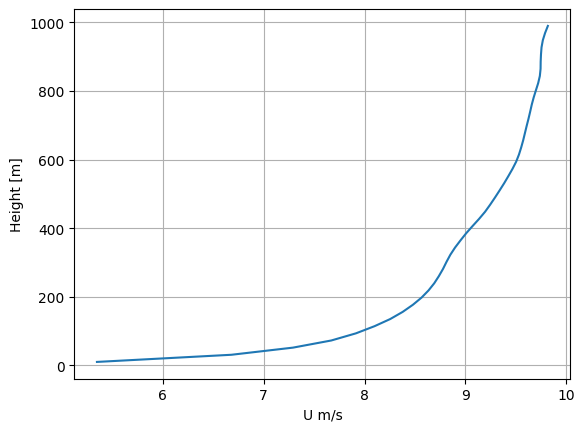

In [34]:
fig, ax = plt.subplots()
ax.plot(uavg1,z)
ax.set_xlabel("U m/s")
ax.set_ylabel("Height [m]")
ax.grid(True)

In [ ]:
d1.variables.